In [16]:
import numpy as np

data=np.load('data-mobile-net-more.npy')
target=np.load('target-mobile-net-more.npy')
print(data.shape[1:])
#loading the save numpy arrays in the previous code

(224, 224, 3)


### Convolutional Neural Network Architecture

In [17]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

baseModel= MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))

headModel= baseModel.output
headModel= AveragePooling2D(pool_size=(4,4),padding='same')(headModel)
headModel= Flatten(name="flatten")(headModel)
headModel= Dense(128,activation='relu')(headModel)
headModel= Dropout(0.5)(headModel)
headModel= Dense(2,activation="softmax")(headModel)

model= Model(inputs=baseModel.input,outputs=headModel)

for layer in baseModel.layers:
    layer.trainable = False
    
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=["accuracy"])

C:\Users\Ayodhya\anaconda3\lib\site-packages\keras_applications\mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [18]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

### Training the CNN for 10 epochs using train data 

In [19]:
history=model.fit(train_data,train_target,epochs=10)

Epoch 1/10
1895/1895 [==============================] - 111s 59ms/sample - loss: 0.5272 - acc: 0.7873
Epoch 2/10
1895/1895 [==============================] - 115s 61ms/sample - loss: 0.2541 - acc: 0.8987
Epoch 3/10
1895/1895 [==============================] - 117s 62ms/sample - loss: 0.1926 - acc: 0.9224
Epoch 4/10
1895/1895 [==============================] - 115s 61ms/sample - loss: 0.1394 - acc: 0.9446
Epoch 5/10
1895/1895 [==============================] - 115s 61ms/sample - loss: 0.1234 - acc: 0.9525
Epoch 6/10
1895/1895 [==============================] - 117s 62ms/sample - loss: 0.1000 - acc: 0.9678
Epoch 7/10
1895/1895 [==============================] - 116s 61ms/sample - loss: 0.0826 - acc: 0.9752
Epoch 8/10
1895/1895 [==============================] - 115s 61ms/sample - loss: 0.0813 - acc: 0.9683
Epoch 9/10
1895/1895 [==============================] - 115s 61ms/sample - loss: 0.0689 - acc: 0.9763
Epoch 10/10
1895/1895 [==============================] - 119s 63ms/sample - loss: 

### Visualizing the loss and the accuracy of trained CNN

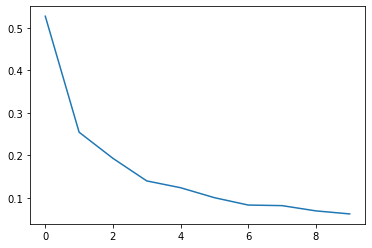

In [20]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])

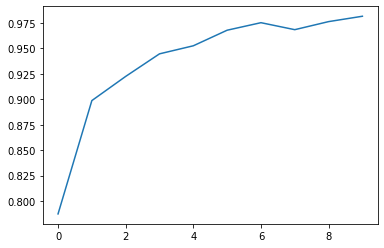

In [21]:
plt.plot(history.history['acc'])
#if not working replace 'accuracy' with 'acc'

### Evaluating the CNN using testing_data

This returns the loss and the accuracy of the Neural Network for Testing data

In [22]:
print(model.evaluate(test_data,test_target))

211/211 [==============================] - 4s 19ms/sample - loss: 0.4683 - acc: 0.8341
[0.46825614331457854, 0.8341232]


In [23]:
test_loss, test_acc=model.evaluate(test_data,test_target, verbose=2)
print('\nTest accuracy:', test_acc)

211/211 - 3s - loss: 0.4683 - acc: 0.8341

Test accuracy: 0.8341232


In [26]:
#model.save('AdultKid-mobile-net98.h5')

In [41]:
#keras_model=load_model('AdultKid.h5')

In [25]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model.tflite"

In [26]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model_file('AdultKid.h5')
tfmodel = converter.convert()
open ("model.tflite" , "wb") .write(tfmodel)

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


5158244

In [27]:
from tensorflow import lite
TF_LITE_MODEL_FILE_NAME = "AdultKid.tflite"

tf_lite_converter = lite.TFLiteConverter.from_keras_model_file( 'AdultKid.h5')
tflite_model = tf_lite_converter.convert()

tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)


INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


5158244